[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Buy on Dip Strategy Backtest'}, xlabel='Date'>

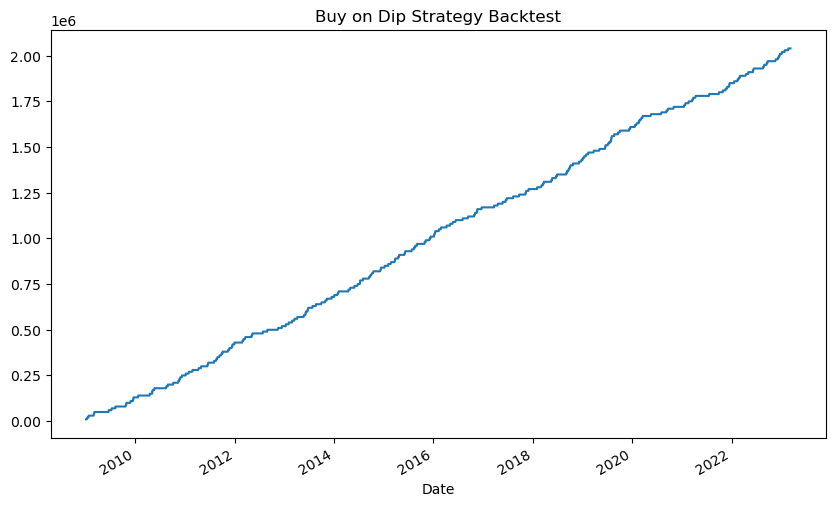

In [1]:
"""
The notebook outlines a "Buy on Dip" strategy backtest for the NiftyBees 50 ETF using the following steps:

### Key Components and Observations

1. **Data Download and Preparation**:
   - Downloads historical data for NIFTYBEES from Yahoo Finance.
   - Computes a 2-period RSI (Relative Strength Index) using the `talib` library to identify oversold conditions.

2. **Signal Generation**:
   - Sets a buy signal when the RSI drops below 10.

3. **Investment and Portfolio Calculation**:
   - Buys shares whenever a signal is generated, assuming a fixed investment per signal.
   - Calculates cumulative portfolio value based on the investments.

4. **Visualization**:
   - Plots the portfolio value over time to evaluate strategy performance.

5. **Performance Metrics**:
   - Computes the final portfolio value and the Annualized Rate of Return (ARR).

### Results
- **Final Portfolio Value**: ₹2,040,000.
- **Annualized Rate of Return**: 45.46%.
"""

import pandas as pd
import yfinance as yf
import talib

# Download NiftyBees 50 ETF data from Yahoo Finance
niftybees = yf.download('NIFTYBEES.NS', start='2002-04-12', end='2023-03-11')

# Calculate 2-period RSI
niftybees['rsi'] = talib.RSI(niftybees['Close'], timeperiod=2)

# Create a new column to store the buy/sell signals
niftybees['signal'] = 0
niftybees.loc[niftybees['rsi'] < 10, 'signal'] = 1

# Calculate the shares bought for each signal
niftybees['shares'] = niftybees['signal'].diff()
niftybees.loc[niftybees['shares'] < 0, 'shares'] = 0
niftybees['shares'] = niftybees['shares'].fillna(0)

# Calculate the investment for each signal
niftybees['investment'] = niftybees['shares'] * 10000

# Calculate the portfolio value for each month
niftybees['portfolio_value'] = niftybees['investment'].cumsum() + 10000

# Plot the portfolio value
niftybees['portfolio_value'].plot(figsize=(10, 6), title='Buy on Dip Strategy Backtest')


In [2]:
portfolio_value = niftybees['portfolio_value'].iloc[-1]
print('Portfolio Value: {:.2f}'.format(portfolio_value))

Portfolio Value: 2040000.00


In [3]:
# Calculate the total return and number of years
total_return = (niftybees['portfolio_value'].iloc[-1] - 10000) / 10000
num_years = (niftybees.index[-1] - niftybees.index[0]).days / 365

# Calculate the annualized rate of return
arr = (1 + total_return) ** (1 / num_years) - 1

print('Annualized Rate of Return: {:.2%}'.format(arr))

Annualized Rate of Return: 45.46%


In [4]:
buy_signals = niftybees.loc[niftybees['signal'] == 1]
print('Buy Signals:')
print(buy_signals.index)

Buy Signals:
DatetimeIndex(['2009-01-12', '2009-01-13', '2009-01-22', '2009-01-23',
               '2009-03-02', '2009-03-03', '2009-03-05', '2009-06-18',
               '2009-07-10', '2009-07-13',
               ...
               '2022-12-16', '2022-12-22', '2022-12-23', '2023-01-06',
               '2023-01-27', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', name='Date', length=424, freq=None)


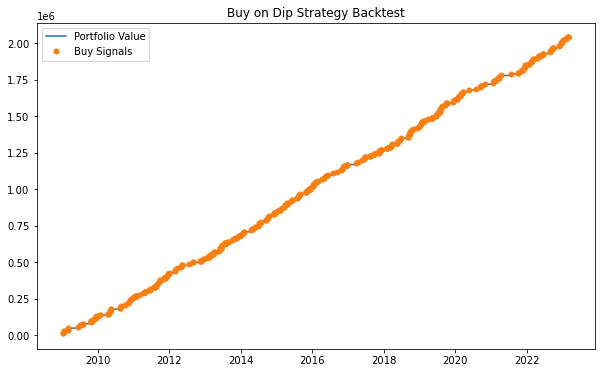

In [5]:
import matplotlib.pyplot as plt

# Plot the portfolio value and add markers for the buy signals
plt.figure(figsize=(10, 6))
plt.plot(niftybees['portfolio_value'])
plt.plot(buy_signals.index, niftybees.loc[niftybees['signal'] == 1, 'portfolio_value'], 'o', markersize=5)
plt.title('Buy on Dip Strategy Backtest')
plt.legend(['Portfolio Value', 'Buy Signals'])
plt.show()